<a href="https://colab.research.google.com/github/kastalaa/NLPCW1/blob/main/empathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [55]:
Data2=pd.read_csv("/content/drive/MyDrive/WASSA23_essay_level_with_labels_train (3).tsv",sep='\t')

In [56]:
Data2=pd.DataFrame(Data2)

In [57]:
ND=pd.DataFrame(Data2)

In [58]:
ND['empathy'].unique()

array([6.83333333, 5.83333333, 1.        , 6.16666667, 1.66666667,
       1.5       , 2.        , 6.        , 7.        , 6.66666667,
       3.5       , 1.83333333, 4.        , 3.66666667, 1.16666667,
       6.33333333, 4.16666667, 5.66666667, 4.83333333, 4.33333333,
       4.5       , 5.33333333, 1.33333333, 3.33333333, 2.33333333,
       5.5       , 2.5       , 2.66666667, 3.        , 3.83333333,
       6.5       , 5.        , 2.16666667, 5.16666667, 2.83333333,
       3.16666667, 4.66666667])

In [59]:
ND['personality_conscientiousness'].unique()

array(['7.0', '5.5', '6.75', '6.0', '3.5', 'unknown', '6.25', '6.5',
       '4.25', '2.5', '4.0', '4.5'], dtype=object)

In [60]:
ND['personality_openess'].unique()

array(['5.5', '5.0', '6.75', '6.0', '2.5', '3.5', '4.5', 'unknown',
       '5.75', '7.0', '4.25', '2.0', '6.5', '4.0'], dtype=object)

In [61]:
ND['personality_extraversion'].unique()

array(['1.0', '2.0', '6.75', '5.0', '6.5', '1.5', 'unknown', '3.25',
       '2.5', '4.5', '3.0', '3.5', '4.0', '6.0', '7.0', '5.5', '5.75'],
      dtype=object)

In [62]:
ND['personality_agreeableness'].unique()

array(['6.5', '5.5', '6.75', '4.5', '7.0', 'unknown', '5.0', '6.0', '3.5',
       '4.25', '2.0', '2.5', '4.0'], dtype=object)

In [63]:
ND['personality_stability'].unique()

array(['6.0', '4.5', '7.0', '3.5', '5.0', '6.5', 'unknown', '4.0', '3.75',
       '1.0', '5.5', '1.5', '3.0', '2.0', '2.5'], dtype=object)

In [64]:
ND['emotion'].unique()

array(['Hope/Sadness', 'Anger', 'Sadness', 'Neutral', 'Disgust/Sadness',
       'Anger/Disgust', 'Fear/Sadness', 'Joy', 'Hope', 'Joy/Neutral',
       'Disgust', 'Neutral/Sadness', 'Neutral/Surprise', 'Anger/Neutral',
       'Hope/Neutral', 'Surprise', 'Anger/Sadness', 'Fear', 'Anger/Joy',
       'Disgust/Fear', 'Fear/Neutral', 'Fear/Hope', 'Joy/Sadness',
       'Anger/Disgust/Sadness', 'Anger/Surprise', 'Disgust/Neutral',
       'Anger/Fear', 'Sadness/Surprise', 'Disgust/Surprise', 'Anger/Hope'],
      dtype=object)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer



In [66]:
le = LabelEncoder()
ND['emotion'] = le.fit_transform(ND['emotion'])


In [67]:
# Convert personality columns to float
personality_columns = [
    'personality_conscientiousness', 'personality_openess',
    'personality_extraversion', 'personality_agreeableness',
    'personality_stability'
]

for col in personality_columns:
    ND[col] = pd.to_numeric(ND[col], errors='coerce')

In [68]:
 ND['personality_conscientiousness']=ND['personality_conscientiousness'].replace('-', '', regex=True)

In [69]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ND[personality_columns + ['empathy', 'distress']])


In [70]:
# Adding scaled features to the DataFrame
for i, col in enumerate(personality_columns + ['empathy', 'distress']):
    ND[col] = scaled_features[:, i]

In [71]:
# Prepare data for classification
# Assuming 'ND' is your DataFrame containing the necessary columns
X = ND[['essay', 'empathy', 'distress'] + personality_columns]
y = ND['emotion']

In [72]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Convert essays to feature vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_essay = vectorizer.fit_transform(X_train['essay']).toarray()
X_test_essay = vectorizer.transform(X_test['essay']).toarray()


In [74]:
# Combine TF-IDF vectors with other features
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)

In [75]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Columns: 4643 entries, 000 to personality_stability
dtypes: float64(4643)
memory usage: 22.4 MB


In [76]:
# Combine TF-IDF vectors with other features, handling potential missing values
X_train_combined = pd.DataFrame(X_train_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_train_combined = pd.concat([X_train_combined, X_train.drop(columns='essay').reset_index(drop=True)], axis=1)
X_train_combined = X_train_combined.fillna(0) # Fill missing values with 0

X_test_combined = pd.DataFrame(X_test_essay, columns=vectorizer.get_feature_names_out()).reset_index(drop=True)
X_test_combined = pd.concat([X_test_combined, X_test.drop(columns='essay').reset_index(drop=True)], axis=1)
X_test_combined = X_test_combined.fillna(0) # Fill missing values with 0

In [77]:
# Define and train classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}

In [78]:
for model_name, model in models.items():
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[model_name] = {'Accuracy': accuracy, 'F1 Score': f1}
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

Random Forest - Accuracy: 0.4906, F1 Score: 0.3866
SVM - Accuracy: 0.4717, F1 Score: 0.3980
Logistic Regression - Accuracy: 0.4717, F1 Score: 0.3917


In [80]:
# Combine TF-IDF vectors with other features
X_train_combined = np.hstack((X_train_essay, X_train.drop(columns='essay').values))
X_test_combined = np.hstack((X_test_essay, X_test.drop(columns='essay').values))


In [81]:
# Define and train classifiers
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


In [82]:
X_train_combined = np.nan_to_num(X_train_combined)
X_test_combined = np.nan_to_num(X_test_combined)

In [83]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}


In [84]:
# Initialize classifiers
classifiers = {
    'Support Vector Machine': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

In [85]:
 X=X.dropna()

                        Accuracy  F1 Score
Support Vector Machine  0.471698  0.398041
Random Forest           0.490566  0.386610
Logistic Regression     0.471698  0.391736


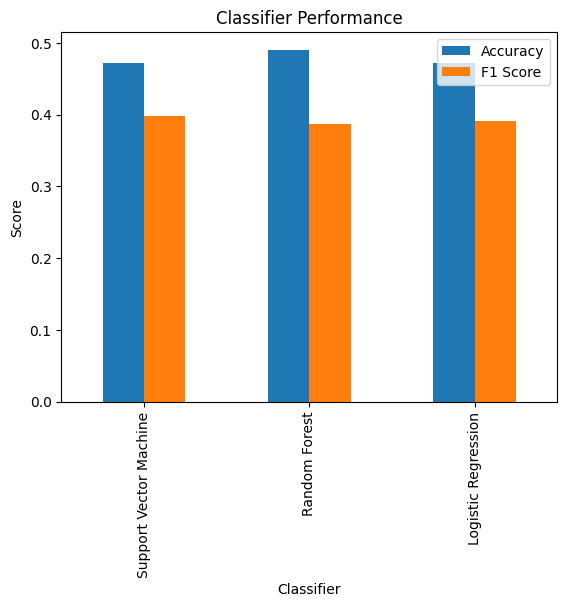

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
# Train and evaluate classifiers
results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train_combined, y_train)
    y_pred = classifier.predict(X_test_combined)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Create a DataFrame with results
df_results = pd.DataFrame(results).transpose()

# Display the results table
print(df_results.to_string())

# Plot the results as a bar chart
df_results.plot(kind='bar')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Performance')
plt.show()

In [87]:
results

{'Support Vector Machine': {'Accuracy': 0.4716981132075472,
  'F1 Score': 0.39804119583149067},
 'Random Forest': {'Accuracy': 0.49056603773584906,
  'F1 Score': 0.3866103300065564},
 'Logistic Regression': {'Accuracy': 0.4716981132075472,
  'F1 Score': 0.3917356352099426}}

In [88]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize the grid search
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_combined, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.4928633920759905


In [89]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_combined, y_train)


# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best score: 0.5071366079240095


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a sample dataset (replace this with your own data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a logistic regression model
log_reg = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)


# Print detailed results
print("\nDetailed results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'],
                              grid_search.cv_results_['params']):
    print(f"Mean score: {mean_score:.3f} for {params}")

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"\n Best score: {test_score:.3f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Detailed results:
Mean score: 0.509 for {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Mean score: 0.509 for {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Mean score: 0.865 for {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Mean score: 0.864 for {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Mean score: 0.865 for {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Mean score: 0.866 for {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Mean score: 0.866 for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Mean score: 0.868 for {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Mean score: 0.875 for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Mean score: 0.874 for {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Mean score: 0.869 for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean score: 0.869 for {'C': 0.1, 'penalty': 'l2', 'solver': '